# Lab Exam


**Import needed libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier 

**Reading the file**

In [2]:
df = pd.read_csv("heart disease prediction.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Show in a bar chart the distribution of the ages of the participants 

### Here I splitted the ages into 6 parts as in the figure

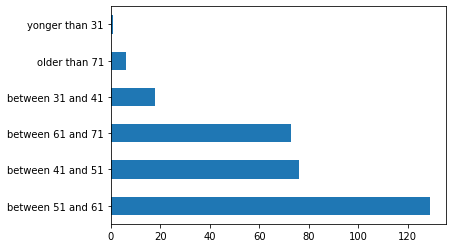

In [3]:
age = df
for index, row in age.iterrows():
    if(row['age'] < 31):
        age.at[index, 'distributedAge'] = 'yonger than 31'
    elif(row['age'] < 41):
        age.at[index, 'distributedAge'] = 'between 31 and 41'
    elif(row['age'] < 51):
        age.at[index, 'distributedAge'] = 'between 41 and 51'
    elif(row['age'] < 61):
        age.at[index, 'distributedAge'] = 'between 51 and 61'
    elif(row['age'] < 71):
        age.at[index, 'distributedAge'] = 'between 61 and 71'
    else:
        age.at[index, 'distributedAge'] = 'older than 71'
    

age['distributedAge'].value_counts().plot.barh();

### Here without splitting which is not understandable and messy

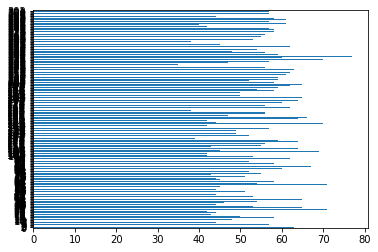

In [4]:
df['age'].plot.barh();

## Show and calculate the degree of correlation between 'trestbps' and 'thalach'

In [5]:
print("Correlation between trestbps and thalach is: {}"
      .format(round(df['trestbps'].corr(df['thalach'], method= 'pearson'), 3)))

Correlation between trestbps and thalach is: -0.047


**The correlation here is almost zero so the relation is weak and the negative sign told us that is the relation is negative side**

## Show in a pie chart the percentage of male and female

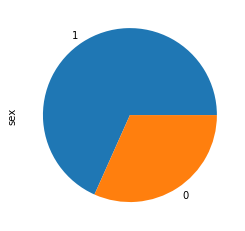

In [6]:
df['sex'].value_counts().plot(kind='pie');

**Here we can see that the sex 1 is almost 66% of the people in this study but I have not idea whether 1 mean male or female**

## Train a Neural network model to predict the state of one's heart depending on the 12th input features

In [7]:
X = df.iloc[:, 0:12]

y = df.iloc[:, 12]

**Choosing the X and y features to use it with prediction**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

**Splitting the X's and y's to test and train sets**

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())
y_predict = mlp.predict(X_test)

**Predict the 'thal' using Neural Network**

In [10]:
print("Confusion Matrix:\n", confusion_matrix(y_test,y_predict))

print ("Accuracy:", accuracy_score(y_test,y_predict)*100) 

print("Report:\n", classification_report(y_test,y_predict))

Confusion Matrix:
 [[ 0  0  1  0]
 [ 0  0  1  3]
 [ 0  3 61 17]
 [ 0  3 36 27]]
Accuracy: 57.89473684210527
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.62      0.75      0.68        81
           3       0.57      0.41      0.48        66

    accuracy                           0.58       152
   macro avg       0.30      0.29      0.29       152
weighted avg       0.58      0.58      0.57       152



C:\Users\lenovo-pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Train a decision tree model to predict the state of one's heart depending on the 12th input features

**Here I already have the splitted X's and y's so I will use it again to compare the result with same inputs**

In [11]:
clf_tree = DecisionTreeClassifier(criterion = "entropy",random_state = 1, max_depth=3, min_samples_leaf=5) 
clf_tree.fit(X_train, y_train)
y_predict = clf_tree.predict(X_test) 

**Predict the 'thal' using decision tree**

In [12]:
print("Confusion Matrix:\n",confusion_matrix(y_test, y_predict)) 
      
print ("Accuracy:",accuracy_score(y_test,y_predict)*100) 
      
print("Report:\n",classification_report(y_test, y_predict)) 

Confusion Matrix:
 [[ 0  0  1  0]
 [ 0  0  0  4]
 [ 0  0 60 21]
 [ 0  0 26 40]]
Accuracy: 65.78947368421053
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.69      0.74      0.71        81
           3       0.62      0.61      0.61        66

    accuracy                           0.66       152
   macro avg       0.33      0.34      0.33       152
weighted avg       0.63      0.66      0.65       152



C:\Users\lenovo-pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Compare the performance of the two models in 4 and 5

**As we saw in the previous two parts**
<br>
**Neural Network and Decision Tree had the same inputs exactly but the accuracy was differ**
<br>
**The accuracy of NN is: 57.89%**
<br>
**The accuracy of DT is: 65.78%**
<br>
**So we can say DT is better than NN**
<br>
<br>
<br>
<br>
**Small note I have restarted the kernel because the number of tries exceeds 100 so it will be badd on the eyes**